In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [8]:
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

100%|█████████▉| 169910272/170498071 [00:14<00:00, 8114439.14it/s]

In [9]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
print(trainloader)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


# Visualise data

In [13]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [14]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [15]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


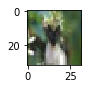

In [16]:
plt.figure(figsize=(1, 1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

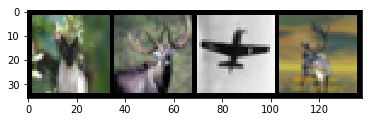

cat deer plane deer


In [18]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single Convolutional Layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
  
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=(1, 1), stride=(2, 2)) #(depth, output channel, kernal size)
    
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
cnn = FirstCNN()

In [22]:
out = cnn(images)
out.shape

# (batch size, output channel, x, y)

torch.Size([4, 16, 16, 16])

In [23]:
for param in cnn.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [24]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


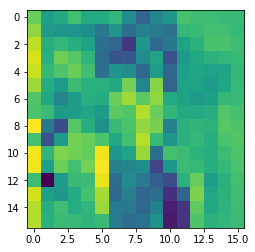

In [25]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
  
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
                 nn.Conv2d(3, 8, 3),           # (N, 3, 32, 32) -> (N, 8, 30, 30)
                 nn.Conv2d(8, 16, 3)           # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )
    
  def forward(self, x):
    x = self.model(x)
    return x

In [27]:
cnn = FirstCNN_v2()
out = cnn(images)
out.shape

torch.Size([4, 16, 28, 28])

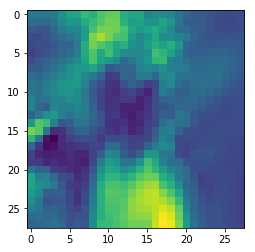

In [28]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
  
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
                 nn.Conv2d(3, 6, 5),            # (N, 3, 32, 32) -> (N, 6, 28, 28)
                 nn.AvgPool2d(2, stride=2),     # (N, 6, 28, 28) -> (N, 6, 14, 14)
                 nn.Conv2d(6, 16, 5),           # (N, 6, 14, 14) -> (N, 16, 10, 10)
                 nn.AvgPool2d(2, stride=2)      # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    
  def forward(self, x):
    x = self.model(x)
    return x

In [30]:
cnn = FirstCNN_v3()
out = cnn(images)
out.shape

torch.Size([4, 16, 5, 5])

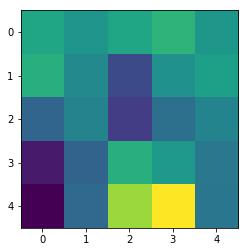

In [31]:
plt.imshow(out[0, 0, :, :].detach().numpy())

# LeNet 

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
                     nn.Conv2d(3, 6, 5),               # (N, 3, 32, 32) -> (N, 6, 28, 28)
                     nn.Tanh(),
                     nn.AvgPool2d(2, stride=2),        # (N, 6, 28, 28) -> (N, 6, 14, 14)
                     nn.Conv2d(6, 16, 5),              # (N, 6, 14, 14) -> (N, 16, 10, 10)
                     nn.Tanh(),
                     nn.AvgPool2d(2, stride=2)         # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model =  nn.Sequential(
                     nn.Linear(400, 120),              # (N, 400) -> (N, 120)
                     nn.Tanh(),
                     nn.Linear(120, 84),               # (N, 120) -> (N, 84)
                     nn.Tanh(),
                     nn.Linear(84, 10)                 # (N, 84) -> (N, 10)
    )
    
  def forward(self, x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x

In [0]:
lenet = LeNet()
out = lenet(images)

In [34]:
print(out)

tensor([[ 0.0547,  0.0260, -0.0640,  0.0575,  0.1318,  0.0576, -0.0519, -0.0116,
          0.0335,  0.1112],
        [ 0.0359,  0.0167, -0.0832,  0.0438,  0.1214,  0.0529, -0.0305, -0.0087,
          0.0163,  0.1134],
        [ 0.0605,  0.0215, -0.0768,  0.0678,  0.0887,  0.0646, -0.0381,  0.0059,
          0.0127,  0.1030],
        [ 0.0339,  0.0281, -0.0713,  0.0565,  0.1102,  0.0542, -0.0395, -0.0021,
          0.0166,  0.1096]], grad_fn=<AddmmBackward>)


In [35]:
max_values, pred_class = torch.max(out.data, 1)
print(max_values)
print(pred_class)

tensor([0.1318, 0.1214, 0.1030, 0.1102])
tensor([4, 4, 9, 4])


# Train CNN

In [36]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = lenet(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [0]:
lenet = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(lenet.parameters())

Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (0, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (1, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (2, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (3, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (4, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (5, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (6, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (7, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (8, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (9, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (10, 16, 10.02, 10.03)
Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f (11, 16, 10.02, 10.03)
Ep

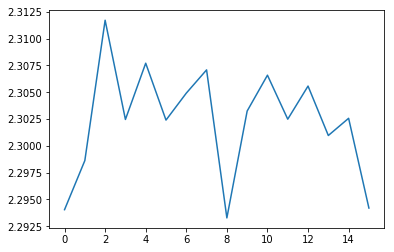

CPU times: user 9min 37s, sys: 14.7 s, total: 9min 52s
Wall time: 9min 52s


In [55]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
  
  for i, data in enumerate(trainloader, 0):
    
    inputs, labels = data
    
    opt.zero_grad()
    
    outputs = lenet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
  
  print('Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f' % (epoch, max_epochs, evaluation(trainloader), evaluation(testloader)))
  
plt.plot(loss_epoch_arr)
plt.show()

# Move to GPU

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = lenet(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [0]:
lenet = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(lenet.parameters())

In [46]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
  
  for i, data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    opt.zero_grad()
    
    outputs = lenet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
  
  print('Epoch : %d/%d, Test accuracy : %0.3f, Train accuracy : %0.3f' % (epoch, max_epochs, evaluation(trainloader), evaluation(testloader)))
  
plt.plot(loss_epoch_arr)
plt.show()
  
  

Epoch : 0/16, Test accuracy : 65.810, Train accuracy : 56.050
Epoch : 1/16, Test accuracy : 66.840, Train accuracy : 55.870
Epoch : 2/16, Test accuracy : 66.094, Train accuracy : 55.240
Epoch : 3/16, Test accuracy : 67.624, Train accuracy : 55.770
Epoch : 4/16, Test accuracy : 68.572, Train accuracy : 56.420
Epoch : 5/16, Test accuracy : 68.710, Train accuracy : 56.060
Epoch : 6/16, Test accuracy : 69.236, Train accuracy : 55.810
Epoch : 7/16, Test accuracy : 69.424, Train accuracy : 55.530
Epoch : 8/16, Test accuracy : 70.912, Train accuracy : 55.990


KeyboardInterrupt: ignored

# Visualising Intermediate Layers

In [0]:
lenet = lenet.to('cpu')

In [48]:
out = lenet(images)
print(out.shape)

torch.Size([4, 10])


In [94]:
out = lenet.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

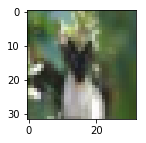

In [96]:
image_id = 0
plt.figure(figsize=(2,2))
imshow(images[image_id, ])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


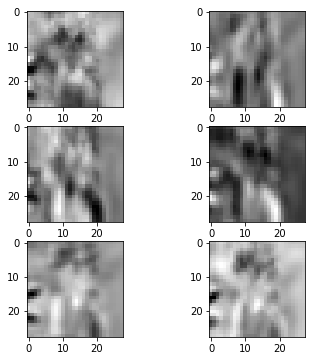

In [101]:
plt.figure(figsize=(6,6))
plt.subplot(321)

for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()